In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

In [2]:
# Download NVIDIA historical data
ticker = "NVDA"
stock = yf.Ticker(ticker)

# Options: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'
hist_data = stock.history(period="max", interval="1d")
hist_data.insert(0, "Day_index", range(1, len(hist_data) + 1))
#OR hist_data = stock.history(start="2020-01-01", end="2024-01-01")
# Save to CSV
filename = f"{ticker}_historical_data.csv"
hist_data.to_csv(filename)

In [3]:
print(f"\nTotal rows: {len(hist_data)}")


Total rows: 6793


In [4]:
print(hist_data.head())

                           Day_index      Open      High       Low     Close  \
Date                                                                           
1999-01-22 00:00:00-05:00          1  0.040112  0.044767  0.035575  0.037605   
1999-01-25 00:00:00-05:00          2  0.040589  0.042021  0.037605  0.041545   
1999-01-26 00:00:00-05:00          3  0.042021  0.042857  0.037724  0.038321   
1999-01-27 00:00:00-05:00          4  0.038440  0.039395  0.036291  0.038202   
1999-01-28 00:00:00-05:00          5  0.038202  0.038440  0.037843  0.038082   

                               Volume  Dividends  Stock Splits  
Date                                                            
1999-01-22 00:00:00-05:00  2714688000        0.0           0.0  
1999-01-25 00:00:00-05:00   510480000        0.0           0.0  
1999-01-26 00:00:00-05:00   343200000        0.0           0.0  
1999-01-27 00:00:00-05:00   244368000        0.0           0.0  
1999-01-28 00:00:00-05:00   227520000        0.0 

In [5]:
import matplotlib.pyplot as plt

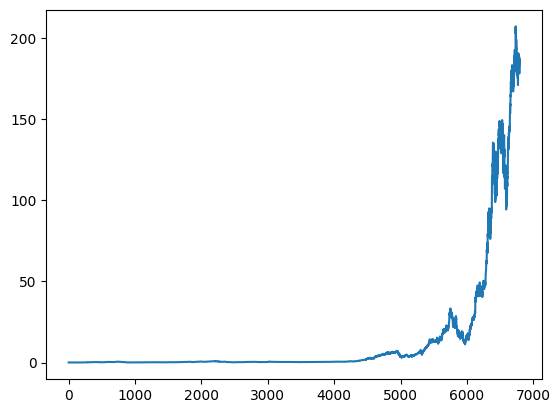

In [6]:
plt.plot(hist_data['Day_index'],hist_data['Close'])
plt.show()

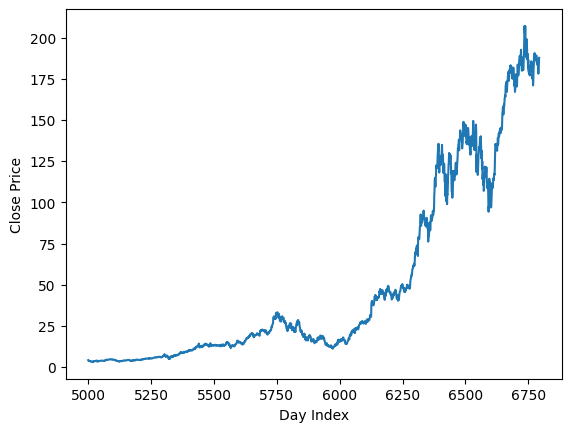

In [7]:
#First values less than 5000 because they are close to zero and can become outliers. 
# As they daviate the mean value of the overall dataset from the actual mean that we required 
df = hist_data[(hist_data["Day_index"] >= 5000)]
plt.plot(df["Day_index"], df["Close"])
plt.xlabel("Day Index")
plt.ylabel("Close Price")
plt.show()
#del subset

In [8]:
print(f"nvda close count - {df['Close'].count()}")
print(f"df close mean - {df['Close'].mean()}")
print(f"histdata(full) mean - {hist_data['Close'].mean()}")
print(f"nvda close mean & histdata(full) mean  diff - {df['Close'].mean() - hist_data['Close'].mean()} ")
print("------------------")
#print(nvda.tail())

nvda close count - 1794
df close mean - 50.595083787688445
histdata(full) mean - 13.946672921800944
nvda close mean & histdata(full) mean  diff - 36.6484108658875 
------------------


In [9]:
print(df.tail())

                           Day_index        Open        High         Low  \
Date                                                                       
2026-01-16 00:00:00-05:00       6789  189.080002  190.440002  186.080002   
2026-01-20 00:00:00-05:00       6790  181.899994  182.380005  177.610001   
2026-01-21 00:00:00-05:00       6791  179.050003  185.380005  178.399994   
2026-01-22 00:00:00-05:00       6792  184.750000  186.169998  183.929993   
2026-01-23 00:00:00-05:00       6793  187.500000  189.600006  186.820007   

                                Close     Volume  Dividends  Stock Splits  
Date                                                                       
2026-01-16 00:00:00-05:00  186.229996  187967200        0.0           0.0  
2026-01-20 00:00:00-05:00  178.070007  223345300        0.0           0.0  
2026-01-21 00:00:00-05:00  183.320007  200381000        0.0           0.0  
2026-01-22 00:00:00-05:00  184.839996  139636600        0.0           0.0  
2026-01-23 

In [10]:
# Create lagged features (previous day's data)
df["Prev_Close"] = df["Close"].shift(1)
df["Prev_High"] = df["High"].shift(1)
df["Prev_Low"] = df["Low"].shift(1)
df["Prev_Volume"] = df["Volume"].shift(1)
df["Prev_Range"] = df["Prev_High"] - df["Prev_Low"]

# Drop the first row (it will have NaN for previous day values)
df.dropna(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11532\995405678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Prev_Close"] = df["Close"].shift(1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11532\995405678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Prev_High"] = df["High"].shift(1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11532\995405678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [11]:
print(df.tail())

                           Day_index        Open        High         Low  \
Date                                                                       
2026-01-16 00:00:00-05:00       6789  189.080002  190.440002  186.080002   
2026-01-20 00:00:00-05:00       6790  181.899994  182.380005  177.610001   
2026-01-21 00:00:00-05:00       6791  179.050003  185.380005  178.399994   
2026-01-22 00:00:00-05:00       6792  184.750000  186.169998  183.929993   
2026-01-23 00:00:00-05:00       6793  187.500000  189.600006  186.820007   

                                Close     Volume  Dividends  Stock Splits  \
Date                                                                        
2026-01-16 00:00:00-05:00  186.229996  187967200        0.0           0.0   
2026-01-20 00:00:00-05:00  178.070007  223345300        0.0           0.0   
2026-01-21 00:00:00-05:00  183.320007  200381000        0.0           0.0   
2026-01-22 00:00:00-05:00  184.839996  139636600        0.0           0.0   
2026-

In [12]:
# Use only information available at market open
x = df[["Day_index", "Open", "Volume", "Prev_Close", "Prev_High", "Prev_Low", "Prev_Range"]]
y = df["Close"]

In [13]:
model = LinearRegression()
model.fit(x, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


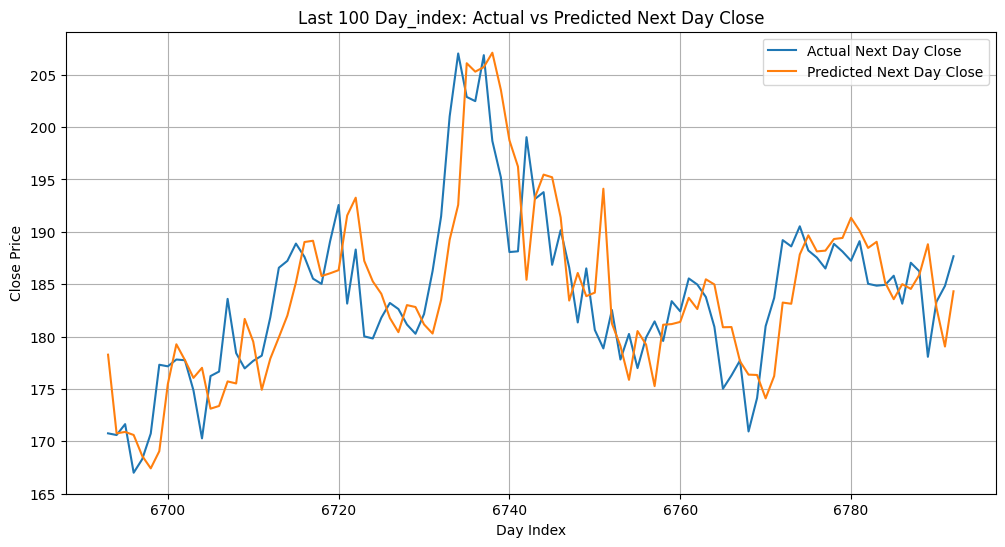

In [14]:
# Corrected model (predicting next-day close)
df  = df.copy()
df ["Target_Next_Day_Close"] = df ["Close"].shift(-1)
df .dropna(inplace=True)

X  = df [["Day_index", "Open", "Volume", "Prev_Close", "Prev_High", "Prev_Low", "Prev_Range"]]
y  = df ["Target_Next_Day_Close"]

model  = LinearRegression()
model .fit(X , y )

# Visualization
last_100  = df .tail(100)

X_last_100  = last_100 [
    ["Day_index", "Open", "Volume", "Prev_Close", "Prev_High", "Prev_Low", "Prev_Range"]
]
y_predicted  = model .predict(X_last_100 )
y_actual  = last_100 ["Target_Next_Day_Close"]

# Plot (rest remains the same)
plt.figure(figsize=(12, 6))
plt.plot(last_100 ["Day_index"], y_actual , label="Actual Next Day Close")
plt.plot(last_100 ["Day_index"], y_predicted , label="Predicted Next Day Close")
plt.xlabel("Day Index")
plt.ylabel("Close Price")
plt.title("Last 100 Day_index: Actual vs Predicted Next Day Close")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Add train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Fit model on training data
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"RMSE: {root_mean_squared_error(y_test, predictions)}")
print(f"R²: {model.score(X_test, y_test)}")

MAE: 3.757937834831735
RMSE: 5.018779534320511
R²: 0.9685207419518157
